<a href="https://colab.research.google.com/github/ShaifaliKhulbe/Project_1/blob/main/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [43]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import pandas as pd
from cleantext import clean
import graphviz
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [134]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [135]:
import osmnx as ox

In [38]:
from gensim.models import Word2Vec

In [2]:
!pip install unicode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 28 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main am

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Convert file into DataFrame**

In [193]:
df = pd.read_csv("/content/artificialintelligence.csv")
user_description = list(df["user_description"])

In [194]:
df["total"] = df["likes"] + df["number_of_retweets"]

In [195]:
df

,Unnamed: 0,tweet_id,user_name,user_description,total_user_tweets,time,tweet,location,followers,following,hashtags,likes,number_of_retweets,total
0,0,1612759190023405568,NSA Name Generator,A new #NSA product name will be tweeted every ...,76981,2023-01-10 10:32:09,🚴‍♂️ whispergenesis #nsa #nationalsecurityagen...,Inside your router,69,121,"['nsa', 'nationalsecurityagency', 'parody', 'a...",0,0,0
1,1,1612759013728595968,Mistral Solutions,Mistral is a technology design and integration...,3691,2023-01-10 10:31:27,"An integrated, performance-oriented, Camera Vi...","Domlur Extension, Bangalore",2194,690,"['mmWave', 'radar']",0,0,0
2,2,1612758970938138624,The Tech Trend,"A Tech community for industry experts, connect...",9737,2023-01-10 10:31:16,Examples of AI in Today’s World\nRead More:- h...,Worldwide,4234,4362,"['AIcourse', 'AItechnology']",0,0,0
3,3,1612758938386153477,NSA Name Generator,A new #NSA product name will be tweeted every ...,76981,2023-01-10 10:31:09,⛵️ watermaster #nsa #nationalsecurityagency #p...,Inside your router,69,121,"['nsa', 'nationalsecurityagency', 'parody', 'a...",0,0,0
4,4,1612758901501427713,Mauricio Amaro L. 🇨🇱🇲🇽,#IT_Thinker #strategist #speaker & #WineLover...,84816,2023-01-10 10:31:00,Which Technologies Will Dominate In 2023 In Th...,México,14233,6748,"['Robot', 'Robotics', 'Automation']",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,3094,1612417446761168897,The Digital Agency,NaN,2793,2023-01-09 11:54:11,New PS5 games: upcoming PlayStation 5 release ...,"Dearborn, MI",792,2601,"['ArtificialIntelligence', 'IoT', 'IoE']",0,0,0
3095,3095,1612417438074773505,NSA Name Generator,A new #NSA product name will be tweeted every ...,77585,2023-01-09 11:54:09,🌼 sleepywaffle #nsa #nationalsecurityagency #p...,Inside your router,69,121,"['nsa', 'nationalsecurityagency', 'parody', 'a...",0,0,0
3096,3096,1612417300933808130,लोखंडwala Buज़,"We are a Hyper-Local Marketing Platform, from ...",7780,2023-01-09 11:53:36,"No! We can't trust them yet. But, in 2023 we’r...",Lokhandwala Complex. Andheri W,1552,4620,[],1,0,1
3097,3097,1612416934779260929,NSA Name Generator,A new #NSA product name will be tweeted every ...,77585,2023-01-09 11:52:09,⚡️ soufflecalendar #nsa #nationalsecurityagenc...,Inside your router,69,121,"['nsa', 'nationalsecurityagency', 'parody', 'a...",0,0,0


# **Clean User Description**

In [196]:
#cleaning the descriptions
clean_description = []

for description in user_description: 
  temp = description
  temp = re.sub("@[A-Za-z0-9_]+","", str(temp)) #remove hashtags
  temp = re.sub("#[A-Za-z0-9_]+","", temp) #remove mentions
  temp = re.sub(r"http[s]?://(\w+(-)?)+\.\S*[^.\s]", "", temp)  #remove links 
  temp = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", temp) #remove links 
  temp = re.sub("\n", '', temp) #remove newlines
  temp = re.sub("\n\n", '', temp) #remove double newlines
  temp = clean(temp, no_emoji=True) #remove emojis
  #print(temp)
  clean_description.append(temp)

In [197]:
df["clean_user_description"] =  clean_description

# **Sort DataFrame and find the user descriptions of the top 50 tweets**

In [198]:
total = df.sort_values(by='total',ascending=False)
top_50_tweets= total.iloc[:50, :]
top_50_descriptions = top_50_tweets["clean_user_description"].values.tolist()

In [199]:
top_50_descriptions

['starfetch is a switzerland-based fintech company that specializes in the research and development of artificial intelligence-based trading algorithms.',
 'the first play to earn gaming analytics and prediction platform. analyse | predict | earn $upo chat: | news:',
 'well ! nivvan here ! artist instagram :',
 'is the best place for game developers, digital artists, animators, video game enthusiasts, cgi and vfx talents.',
 'award-winning writer. short stories, novels, screenplays. penguin random house canada student award for fiction 2022 (top 3). words & photos all my fault.',
 'data scientist. freelancer. global speaker. founder . top influencer. phd astrophysics',
 'is the best place for game developers, digital artists, animators, video game enthusiasts, cgi and vfx talents.',
 'helping data driven companies generate valuetop10influencer',
 "we science. we're australia's national science agency. we solve the greatest challenges through innovative science and technology. rts not e

# **Preprocess User Description**
## Extract words with JJ POS tags using NLTK

In [200]:
def preprocess_document(clean_description):
  document = []
  for sent in clean_description:   
    tokens = []
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    for i in sent:
      if i[1] == 'JJ':
        if len(i[0])>4:
          tokens.append(i[0])
    document.append(tokens)
    while [] in document :
      document.remove([])
 
  return document

In [185]:
def get_entities(document):
    # in our case, entities are all unique words
    unique_words = []
    for sent in document:
        for word in sent:
            if word not in unique_words:
                unique_words.append(word)
    return unique_words

# **Building the graph**

In [24]:
def build_graph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    
    # get graph nodes
    nodes = get_entities(pdoc)
    
    # get graph edges
    edges = get_relations(pdoc)
    
    # create graph structure with NetworkX
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G

In [25]:
def build_Digraph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    
    # get graph nodes
    nodes = get_entities(pdoc)
    
    # get graph edges
    edges = get_relations(pdoc)
    
    # create graph structure with NetworkX
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G

In [26]:
def get_relations(document):
    # in our case, relations are bigrams in sentences
    bigrams = []
    for sent in document:
        for i in range(len(sent)-1):
            # for every word and the next in the sentence
            pair = [sent[i], sent[i+1]]
            # only add unique bigrams
            if pair not in bigrams:
                bigrams.append(pair)
    return bigrams

In [175]:
def plot_graph(G, node_color, font_color, title=None):
    # set figure size
    plt.figure(figsize=(10,10))
    
    # define position of nodes in figure
    pos = nx.nx_agraph.graphviz_layout(G)
    
    # draw nodes and edges
    nx.draw(G, pos=pos, with_labels=True, node_size = 800, font_size = 15, node_shape = "*", font_color = font_color, node_color= node_color)
    
    # get edge labels (if any)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    
    # draw edge labels (if any)
    nx.draw_networkx_edge_labels(G, pos,  edge_labels=edge_labels)
    
    # plot the title (if any)
    plt.title(title)
    
    plt.savefig("Graph.png", format="PNG")
    plt.show()
    return

In [28]:
def get_weighted_edges(document):
    # in our case, relations are bigrams in sentences
    # weights are number of equal bigrams
    # use a dict to store number of counts
    bigrams = {}
    for sent in document:
        for i in range(len(sent)-1):
        
            # transform to hashable key in dict
            pair = str([sent[i], sent[i+1]])
            
            if pair not in bigrams.keys():
                # weight = 1
                bigrams[pair] = 1
            else:
                # already exists, weight + 1
                bigrams[pair] += 1
                
    # convert to NetworkX standard form each edge connecting nodes u and v = [u, v, weight]
    weighted_edges_format = []
    for pair, weight in bigrams.items():
        # revert back from hashable format
        w1, w2 = eval(pair)
        weighted_edges_format.append([w1, w2, weight])
        
    return weighted_edges_format

In [191]:
def build_weighted_digraph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    
    # get graph nodes
    nodes = get_entities(pdoc)
    
    # get weighted edges
    weighted_edges = get_weighted_edges(pdoc)
    
    # create graph structure with NetworkX
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)
    
    return G

In [186]:
print(build_graph(top_50_descriptions))

Graph with 42 nodes and 21 edges


In [187]:
print(build_Digraph(top_50_descriptions))

DiGraph with 42 nodes and 21 edges


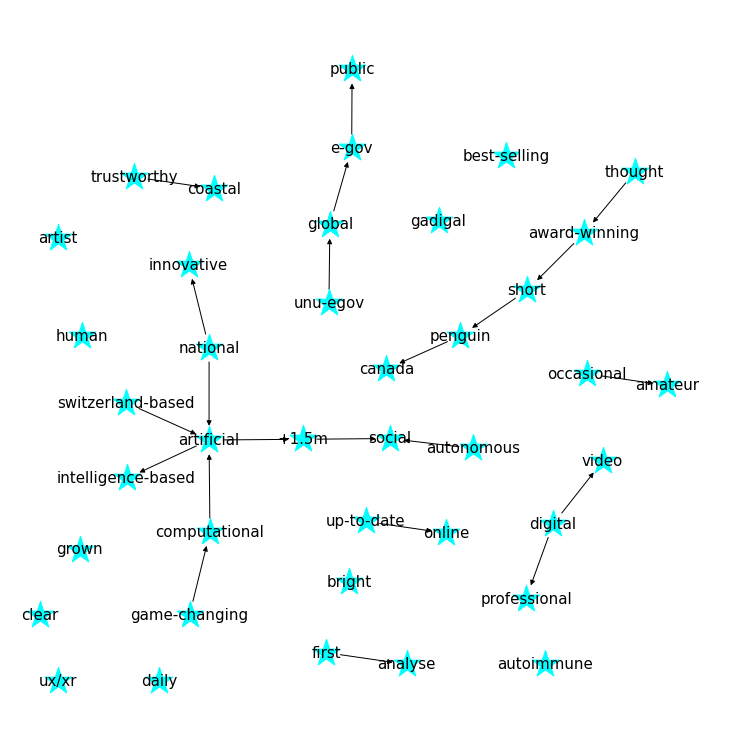

In [201]:
plot_graph(G = build_Digraph(top_50_descriptions), node_color = '#00FFFF', font_color ='#000000', title=None)